In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('dark_background')
import data
from util.style import *
import viz
from tqdm import tqdm
outcome_def = 'y_consec_thresh'

In [8]:
df = data.get_data()
df = df[df['valid'] == 1] # exclude test cells, short/long tracks, hotspots
viz.print_metadata()
y = np.array(df[outcome_def].values).astype(int)
n = df.shape[0]

valid:		2066 aux+ / 7594 (0.272)
----------------------------------------
hotspots:	 349 aux+ /  349
short:		 283 aux+ / 5697 (0.950)
long:		 108 aux+ /  113 (0.953)
hard:		1482 aux+ / 2936 (0.505)

lifetime threshes 15 161


In [10]:
bucket_counts = {}
feat_names = data.get_feature_names(df)
feat_names = data.select_final_feats(feat_names, binarize=True)
X = df[feat_names]
for i in tqdm(range(X.shape[0])): #X.shape[0]):
    x = X.iloc[i]
    s = ''.join(x.values.astype(int).astype(str).tolist())
    ylab = y[i]
    if not s in bucket_counts:
        bucket_counts[s] = [0, 0]
        bucket_counts[s][ylab] = 1
    else:
        bucket_counts[s][ylab] += 1

100%|██████████| 2936/2936 [00:01<00:00, 1983.25it/s]


In [11]:
vals = np.array([x for x in bucket_counts.values()]) # n x 2
counts_per_bucket = vals.sum(axis=1).flatten() # n
purities = vals[:, 1] / vals.sum(axis=1) # n 
is_pure = (purities==0) | (purities==1)
num_pure_buckets = np.sum(is_pure)
num_pts_in_pure = counts_per_bucket[is_pure].sum()

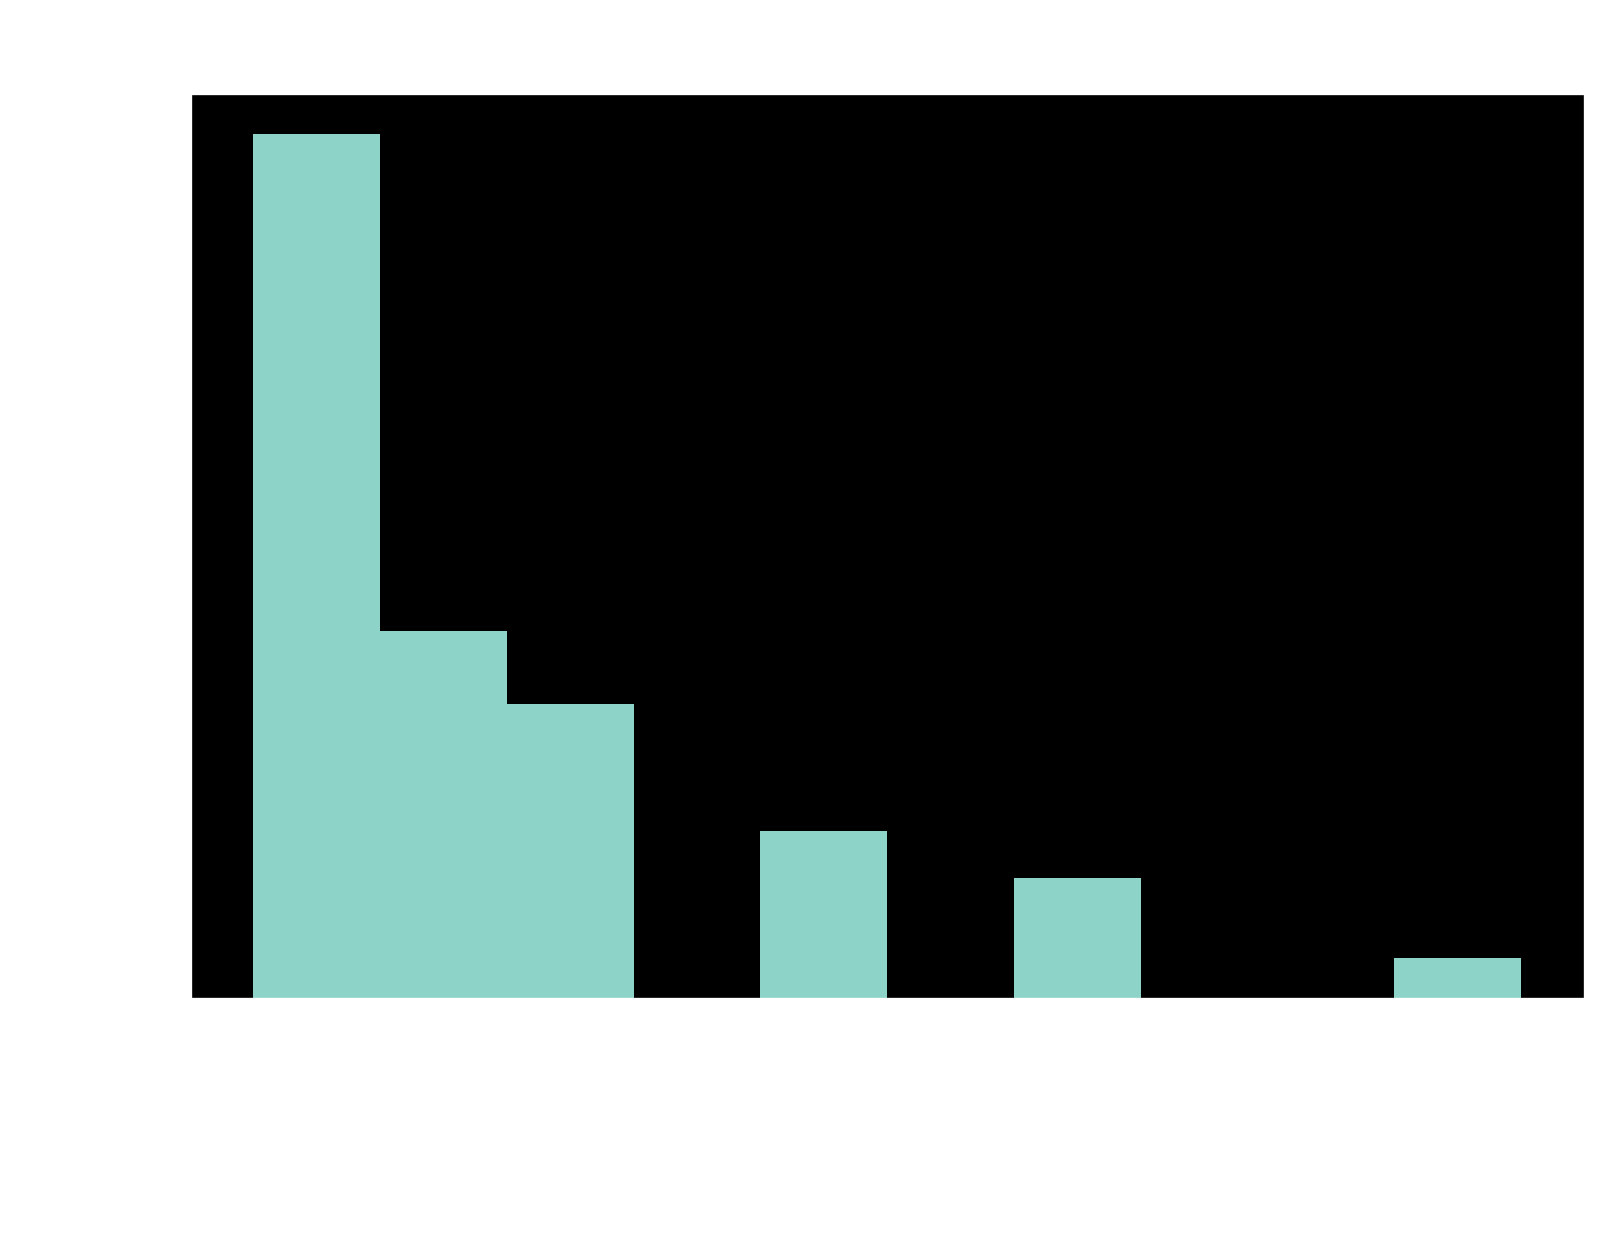

In [12]:
plt.figure(dpi=300)
plt.hist(counts_per_bucket, log=True)
plt.yscale('log')
plt.ylabel('count')
plt.title('distribution of all points into buckets')
plt.xlabel(f'number of values in a bucket\n(number of non-empty buckets: {vals.shape[0]})\n(number of points: {X.shape[0]})')
plt.show()

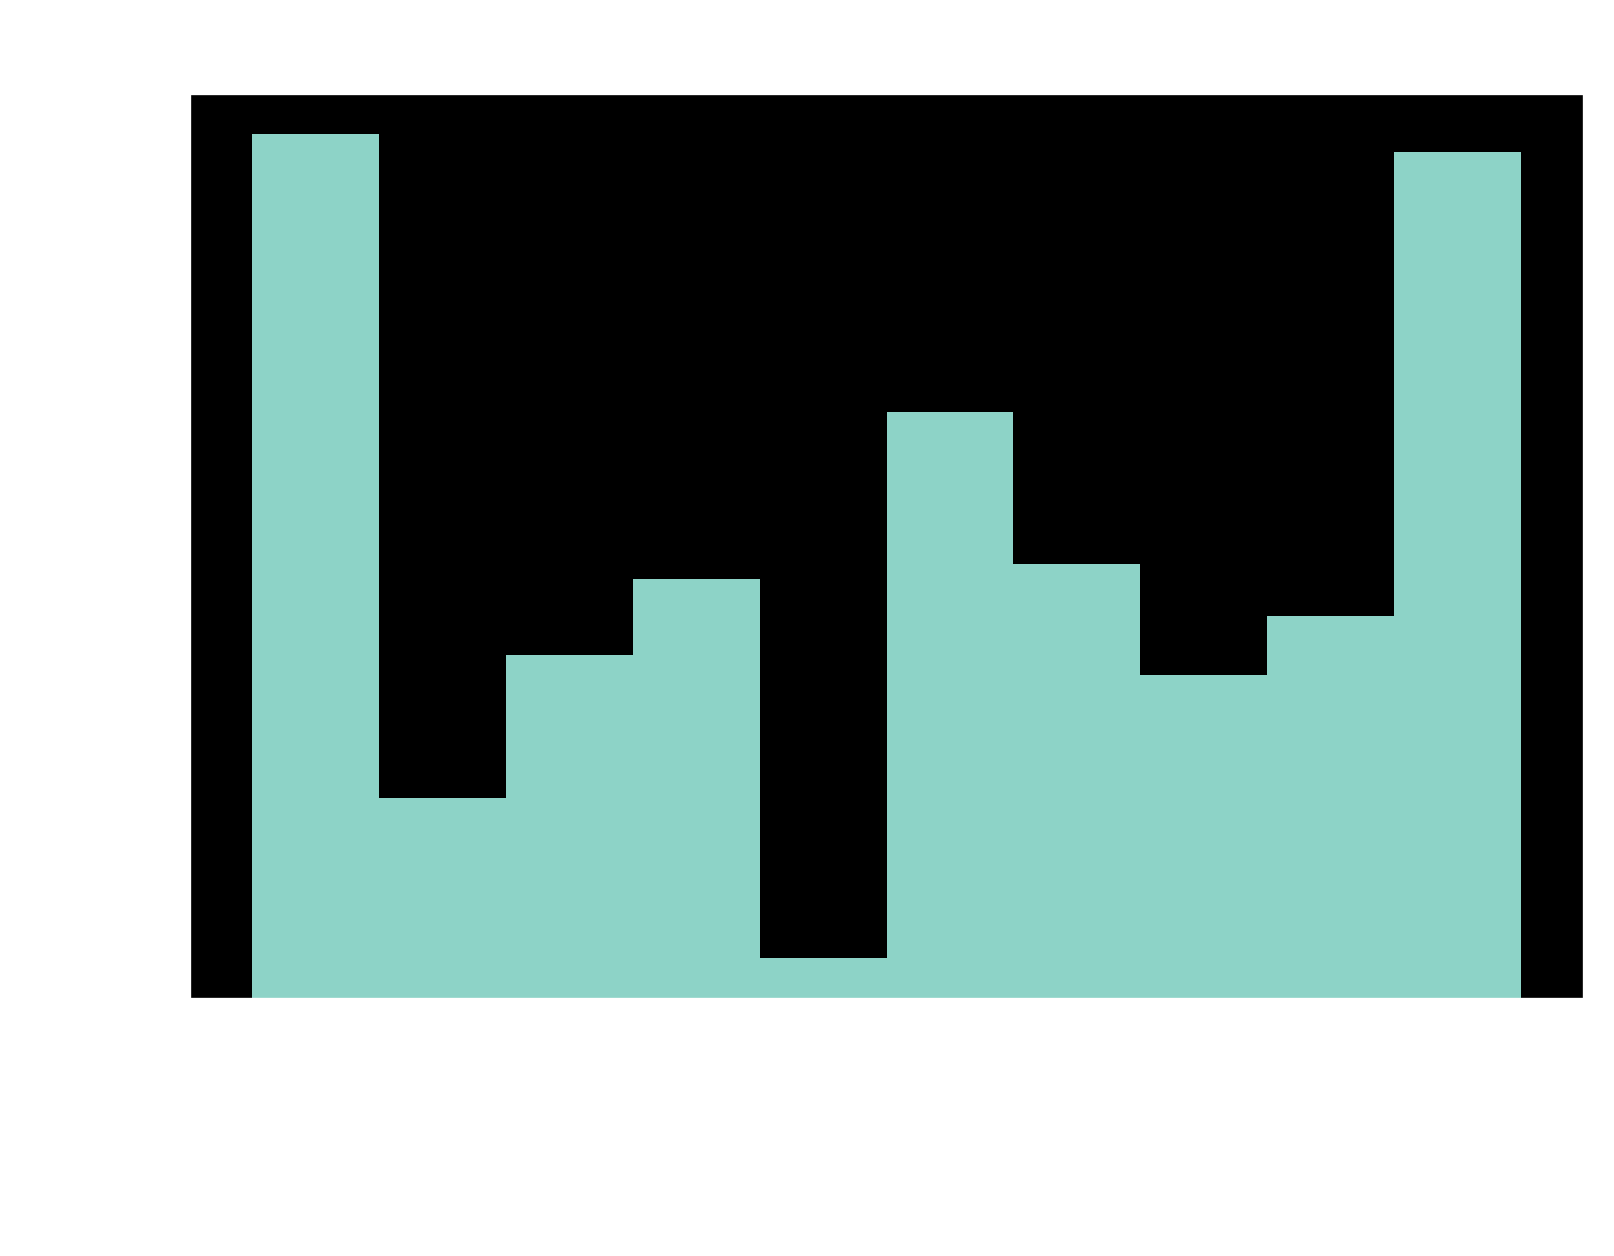

In [16]:
plt.figure(dpi=300)
plt.hist(purities.flatten(), log=True)
plt.yscale('log')
plt.ylabel('count')
plt.title('distribution of "purities" of different buckets')
plt.xlabel(f'"purity of bucket" = fraction of bucket which is aux+\n(number of non-pure buckets: {num_pure_buckets})\n(number of points in non-pure buckets: {X.shape[0] - num_pts_in_pure})')
plt.show()